In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

def export(df: pd.DataFrame, path_no_dot: str, index=True):
    df.to_csv(f'exports/{path_no_dot}.csv', index=index)
    df.to_excel(f'exports/{path_no_dot}.xlsx', index=index)


# when 2023 singles is finishe, uncomment ###'s from this cell!

# data initialization
players = pd.read_csv('data/players.csv')
matches_2021_2s = pd.read_csv('data/matches_2021_2s.csv')
matches_2022_1s = pd.read_csv('data/matches_2022_1s.csv')
matches_2022_2s = pd.read_csv('data/matches_2022_2s.csv')
### matches_2023_1s = pd.read_csv('data/matches_2023_1s.csv')

# data cleaning
players.index.name = "Players"
players.player = players.player.apply(str.strip)
# casting to ints!
players.replace(to_replace="None", value=0, inplace=True)
players['seed_2021_2s'] = players['seed_2021_2s'].apply(int)
players['seed_2022_1s'] = players['seed_2022_1s'].apply(int)
players['seed_2022_2s'] = players['seed_2022_2s'].apply(int)
players.replace(to_replace=0, value=None, inplace=True)

# map seeds to matches
map_2021_2s = pd.Series(players['seed_2021_2s'].values, index=players['player']).dropna().to_dict()
matches_2021_2s['seed1'] = matches_2021_2s.t1p1.map(map_2021_2s)
matches_2021_2s['seed2'] = matches_2021_2s.t2p1.map(map_2021_2s)
map_2022_1s = pd.Series(players['seed_2022_1s'].values, index=players['player']).dropna().to_dict()
matches_2022_1s['seed1'] = matches_2022_1s.p1.map(map_2022_1s)
matches_2022_1s['seed2'] = matches_2022_1s.p2.map(map_2022_1s)
map_2022_2s = pd.Series(players['seed_2022_2s'].values, index=players['player']).dropna().to_dict()
matches_2022_2s['seed1'] = matches_2022_2s.t1p1.map(map_2022_2s)
matches_2022_2s['seed2'] = matches_2022_2s.t2p1.map(map_2022_2s)
### map_2023_1s = pd.Series(players['seed_2023_1s'].values, index=players['player']).dropna().to_dict()
### matches_2023_1s['seed1'] = matches_2022_1s.p1.map(map_2023_1s)
### matches_2023_1s['seed2'] = matches_2022_1s.p2.map(map_2023_1s)

# create a cumulative singles matches table
matches_1s = pd.concat(
    [matches_2022_1s
    ] ### , matches_2023_1s]
    ).reset_index(drop=True)
matches_1s.index.name = "All Singles Matches"
# create a cumulative doubles matches table
matches_2s = pd.concat(
    [matches_2021_2s
    , matches_2022_2s]
    ).reset_index(drop=True)
matches_2s.index.name = "All Doubles Matches"

# cleaning singles matches and doubles mataches
matches_1s.p1 = matches_1s.p1.apply(str.strip)
matches_1s.p2 = matches_1s.p2.apply(str.strip)
matches_1s.seed1 = matches_1s.seed1.apply(int)
matches_1s.seed2 = matches_1s.seed2.apply(int)
matches_2s.t1p1 = matches_2s.t1p1.apply(str.strip)
matches_2s.t1p2 = matches_2s.t1p2.apply(str.strip)
matches_2s.t2p1 = matches_2s.t2p1.apply(str.strip)
matches_2s.t2p2 = matches_2s.t2p2.apply(str.strip)
matches_2s.seed1 = matches_2s.seed1.apply(int)
matches_2s.seed2 = matches_2s.seed2.apply(int)

# per-match total possible cups
matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# number of events played in 
players['num_events'] = players.iloc[:,["seed" == x[0:4] for x in players.columns]].count(axis=1)

# finding seed z_scores for each player
players['z_seed_2021_2'] = (players.seed_2021_2s.astype(float) - players.seed_2021_2s.astype(float).mean()) / players.seed_2021_2s.astype(float).std()
players['z_seed_2022_1'] = (players.seed_2022_1s.astype(float) - players.seed_2022_1s.astype(float).mean()) / players.seed_2022_1s.astype(float).std()
players['z_seed_2022_2'] = (players.seed_2022_2s.astype(float) - players.seed_2022_2s.astype(float).mean()) / players.seed_2022_2s.astype(float).std()
### players['z_seed_2023_1'] = (players.seed_2023_1s.astype(float) - players.seed_2023_1s.astype(float).mean()) / players.seed_2023_1s.astype(float).std()

# negatives means you're typically seeded better than average, positives means you're typically seeded worse than average
players['avg_norm_seed'] = np.nanmean(players.loc[:,['z' in x for x in players.columns]].astype(float), axis=1)

# cell outputs
display(players)
display(matches_1s)
display(matches_2s)

,player,year_2023,seed_2021_2s,seed_2022_1s,seed_2022_2s,num_events,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,avg_norm_seed
Players,,,,,,,,,,
0,Kristian Banlaoi,None,None,1,None,1,NaN,-1.565248,NaN,-1.565248
1,Kevin Cooper,4,2,2,2,3,-1.056443,-1.341641,-1.129159,-1.175748
2,Rohan Chowla,2,3,3,1,3,-0.633866,-1.118034,-1.505545,-1.085815
3,Rose Roché,4,1,4,3,3,-1.479020,-0.894427,-0.752773,-1.042073
4,Aaron Carter,4,1,5,3,3,-1.479020,-0.670820,-0.752773,-0.967538
5,Roman Ramirez,4,2,6,2,3,-1.056443,-0.447214,-1.129159,-0.877605
6,Coby Lovelace,4,4,7,6,3,-0.211289,-0.223607,0.376386,-0.019503
7,Paul Bartenfeld,4,6,8,9,3,0.633866,0.000000,1.505545,0.713137
8,Jason Jackson,3,4,9,4,3,-0.211289,0.223607,-0.376386,-0.121356


,event,match_number,fe1,fe2,p1,p2,score1,score2,seed1,seed2,tpc
All Singles Matches,,,,,,,,,,,
0,2022_1s,1,False,False,Paul Bartenfeld,Jason Jackson,4,6,8,9,6
1,2022_1s,2,False,False,Rose Roché,Gabe Silverstein,5,6,4,13,6
2,2022_1s,3,False,False,Aaron Carter,Leah Baetcke,2,6,5,12,6
3,2022_1s,4,False,False,Kevin Cooper,Carla Betancourt,5,6,2,15,6
4,2022_1s,5,False,False,Coby Lovelace,Jack Massingill,5,6,7,10,6
5,2022_1s,6,False,False,Rohan Chowla,Reagan Fryatt,6,5,3,14,6
6,2022_1s,7,False,False,Roman Ramirez,Evan Sooklal,6,4,6,11,6
7,2022_1s,8,True,True,Rose Roché,Aaron Carter,3,6,4,5,6
8,2022_1s,9,True,True,Kevin Cooper,Coby Lovelace,6,5,2,7,6


,event,match_number,fe1,fe2,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2,tpc
All Doubles Matches,,,,,,,,,,,,,
0,2021_2s,1,False,False,Rose Roché,Aaron Carter,Brian Tafazoli,Evan Sooklal,6,3,1,8,6
1,2021_2s,2,False,False,Coby Lovelace,Jason Jackson,Jack Massingill,Will Simpson,6,3,4,5,6
2,2021_2s,3,False,False,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,3,2,7,6
3,2021_2s,4,False,False,Rohan Chowla,Levin Lee,Paul Bartenfeld,Leah Baetcke,6,0,3,6,6
4,2021_2s,5,True,True,Brian Tafazoli,Evan Sooklal,Jack Massingill,Will Simpson,4,6,8,5,6
5,2021_2s,6,True,True,Ann Hall,Anna Brown,Paul Bartenfeld,Leah Baetcke,6,4,7,6,6
6,2021_2s,7,False,False,Rose Roché,Aaron Carter,Coby Lovelace,Jason Jackson,5,6,1,4,6
7,2021_2s,8,False,False,Kevin Cooper,Roman Ramirez,Rohan Chowla,Levin Lee,5,6,2,3,6
8,2021_2s,9,True,True,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,5,2,7,6


In [2]:
# # CUPS TABLE

# # initalization with every player
# cups_table = pd.DataFrame()
# cups_table['player'] = players.player
# cups_table.index.name = "Cups Table"

# # number of games played in singles
# list_games_played_1s = list()
# for name in players.player:
#     games_played_1s = 0
#     for i in range(len(matches_1s)):
#         if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
#             games_played_1s += 1
#     list_games_played_1s.append(games_played_1s)
# cups_table['GP_1s'] = list_games_played_1s

# # number of games played in doubles
# list_games_played_2s = list()
# for name in players.player:
#     games_played_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
#             games_played_2s += 1
#     list_games_played_2s.append(games_played_2s)
# cups_table['GP_2s'] = list_games_played_2s

# # per-match total possible cups
# matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
# matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# # total number of cups scored in singles
# list_CS_1s = list()
# for name in players.player:
#     CS_1s = 0
#     for i in range(len(matches_1s)):
#         if name == matches_1s.loc[i, "p1"]:
#             CS_1s += matches_1s.loc[i, 'score1']
#         if name == matches_1s.loc[i, "p2"]:
#             CS_1s += matches_1s.loc[i, 'score2']
#     list_CS_1s.append(CS_1s)
# cups_table['CS_1s'] = list_CS_1s

# # total number of cups available in singles
# list_CA_1s = list()
# for name in players.player:
#     CA_1s = 0
#     for i in range(len(matches_1s)):
#         if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
#             CA_1s += matches_1s.loc[i, 'tpc']
#     list_CA_1s.append(CA_1s)
# cups_table['CA_1s'] = list_CA_1s

# # total number of cups scored in doubles (weighted by 0.5)
# list_CS_2s = list()
# for name in players.player:
#     CS_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
#             CS_2s += matches_2s.loc[i, 'score1'] / 2
#         if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
#             CS_2s += matches_2s.loc[i, 'score2'] / 2
#     list_CS_2s.append(CS_2s)
# cups_table['CS_2s'] = list_CS_2s

# # total number of cups availabe in doubles
# list_CA_2s = list()
# for name in players.player:
#     CA_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
#             CA_2s += matches_2s.loc[i, 'tpc'] / 2
#     list_CA_2s.append(CA_2s)
# cups_table['CA_2s'] = list_CA_2s

# # cups scored per game in singles
# cups_table['CS/GP_1s'] = cups_table.CS_1s / cups_table.GP_1s

# # cups scored per game in doubles (weighted by 0.5)
# cups_table['CS/GP_2s'] = cups_table.CS_2s / cups_table.GP_2s


# # per-player percent cups hit, both singles and doubles (weighted by 0.5)
# # THIS IS THE METRIC TO DETERMINE PAST PERFORMANCE, AND POTENTIAL SEEDING, favors efficiency regardless of participation
# cups_table['PCT_CS'] = cups_table.apply(lambda row: (row.CS_1s + row.CS_2s) / (row.CA_1s + row.CA_2s) * 100, axis=1)
# # cups_table['rank_PCT_CS'] = cups_table.PCT_CS.rank(ascending=False).apply(int)

# display(cups_table.sort_values('PCT_CS', ascending=False).reset_index(drop=True))

In [3]:

## FA DIFFERENTIAL TABLE

fa_table = pd.DataFrame()
fa_table['player'] = players.player
fa_table.index.name = "Cup Points Table"

# number of games played in singles
list_games_played_1s = list()
for name in players.player:
    games_played_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            games_played_1s += 1
    list_games_played_1s.append(games_played_1s)
fa_table['GP_1s'] = list_games_played_1s


# pf_1s: 'points for' player
# pa_1s: 'points against' player
# +/-_1s: 'net differential' player
list_pf_1s = list()
list_pa_1s = list()
for name in players.player:
    pf_1s = 0
    pa_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            pf_1s += matches_1s.loc[i, "score1"]
            pa_1s += matches_1s.loc[i, "score2"]
        if name == matches_1s.loc[i, "p2"]:
            pf_1s += matches_1s.loc[i, "score2"]
            pa_1s += matches_1s.loc[i, "score1"]
            
    list_pf_1s.append(pf_1s)
    list_pa_1s.append(pa_1s)

fa_table['PF_1s'] = list_pf_1s
fa_table['PA_1s'] = list_pa_1s

# total number of cups available in singles
list_CA_1s = list()
for name in players.player:
    CA_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            CA_1s += matches_1s.loc[i, 'tpc']
    list_CA_1s.append(CA_1s)
fa_table['CA_1s'] = list_CA_1s

fa_table['+/-_1s'] = fa_table['PF_1s'] - fa_table['PA_1s']

# score differential in doubles (weighted by 0.5 or weighted by 1.0) idk!


# number of games played in doubles
list_games_played_2s = list()
for name in players.player:
    games_played_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            games_played_2s += 1
    list_games_played_2s.append(games_played_2s)
fa_table['GP_2s'] = list_games_played_2s

# pf_2s: 'points for' player
# pa_2s: 'points against' player
# +/-_2s: 'net differential' player
list_pf_2s = list()
list_pa_2s = list()
for name in players.player:
    pf_2s = 0
    pa_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            pf_2s += matches_2s.loc[i, "score1"] # * 0.5
            pa_2s += matches_2s.loc[i, "score2"] # * 0.5
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            pf_2s += matches_2s.loc[i, "score2"] # * 0.5
            pa_2s += matches_2s.loc[i, "score1"] # * 0.5
            
    list_pf_2s.append(pf_2s)
    list_pa_2s.append(pa_2s)

weight = 1

fa_table['PF_2s'] = [x * weight for x in list_pf_2s]
fa_table['PA_2s'] = [x * weight for x in list_pa_2s]

# total number of cups availabe in doubles
list_CA_2s = list()
for name in players.player:
    CA_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            CA_2s += matches_2s.loc[i, 'tpc'] # / 2
    list_CA_2s.append(CA_2s)
fa_table['CA_2s'] = list_CA_2s

fa_table['+/-_2s'] = fa_table['PF_2s'] - fa_table['PA_2s']

# cummulative
fa_table['GP'] = fa_table.GP_1s + fa_table.GP_2s
fa_table['PF'] = fa_table.PF_1s + fa_table.PF_2s
fa_table['PA'] = fa_table.PA_1s + fa_table.PA_2s
fa_table['CA'] = fa_table.CA_1s + fa_table.CA_2s
fa_table['+/-'] = fa_table.PF - fa_table.PA

# per game
fa_table['PF/G'] = fa_table['PF'] / fa_table['GP']
fa_table['PA/G'] = fa_table['PA'] / fa_table['GP']
fa_table['CA/G'] = fa_table['CA'] / fa_table['GP']
fa_table['+/-/G'] = fa_table['+/-'] / fa_table['GP']

# dominance
fa_table['PF/PA'] = fa_table.apply(lambda row: (row.PF_1s + row.PF_2s) / (row.PA_1s + row.PA_2s) * 100, axis=1)
# efficiency v1
fa_table['PF/CA'] = fa_table.apply(lambda row: (row.PF_1s + row.PF_2s) / (row.CA_1s + row.CA_2s) * 100, axis=1)
# efficiency
fa_table['(+/-)/CA'] = fa_table.apply(lambda row: ((row.PF_1s + row.PF_2s) - (row.PA_1s + row.PA_2s)) / (row.CA_1s + row.CA_2s), axis=1)

with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(fa_table.sort_values('(+/-)/CA', ascending=False).reset_index(drop=True))

,player,GP_1s,PF_1s,PA_1s,CA_1s,+/-_1s,GP_2s,PF_2s,PA_2s,CA_2s,+/-_2s,GP,PF,PA,CA,+/-,PF/G,PA/G,CA/G,+/-/G,PF/PA,PF/CA,(+/-)/CA
0,Levin Lee,0,0,0,0,0,11,68,50,72,18,11,68,50,72,18,6.181818,4.545455,6.545455,1.636364,136.000000,94.444444,0.250000
1,Roman Ramirez,9,62,42,63,20,10,53,49,60,4,19,115,91,123,24,6.052632,4.789474,6.473684,1.263158,126.373626,93.495935,0.195122
2,Rohan Chowla,6,42,42,48,0,11,68,50,72,18,17,110,92,120,18,6.470588,5.411765,7.058824,1.058824,119.565217,91.666667,0.150000
3,Kevin Cooper,5,26,22,30,4,10,53,49,60,4,15,79,71,90,8,5.266667,4.733333,6.000000,0.533333,111.267606,87.777778,0.088889
4,Kristian Banlaoi,3,16,15,18,1,0,0,0,0,0,3,16,15,18,1,5.333333,5.000000,6.000000,0.333333,106.666667,88.888889,0.055556
5,Jack Massingill,4,20,21,24,-1,9,47,43,54,4,13,67,64,78,3,5.153846,4.923077,6.000000,0.230769,104.687500,85.897436,0.038462
6,Coby Lovelace,2,10,12,12,-2,8,48,44,54,4,10,58,56,66,2,5.800000,5.600000,6.600000,0.200000,103.571429,87.878788,0.030303
7,Gabe Silverstein,3,13,17,18,-4,5,27,22,30,5,8,40,39,48,1,5.000000,4.875000,6.000000,0.125000,102.564103,83.333333,0.020833
8,Will Simpson,0,0,0,0,0,8,39,40,48,-1,8,39,40,48,-1,4.875000,5.000000,6.000000,-0.125000,97.500000,81.250000,-0.020833
9,Jason Jackson,3,14,16,18,-2,7,45,45,51,0,10,59,61,69,-2,5.900000,6.100000,6.900000,-0.200000,96.721311,85.507246,-0.028986


In [4]:
# WIN-LOSS TABLE: favors winners and those with greater participation
# W = UW + EW
# L = UL + EL
# RL = URL + ERL

wl_table = pd.DataFrame()
wl_table['player'] = players.player
wl_table['year_2023'] = players.year_2023
wl_table.index.name = "All Records Table"

# wins in singles
list_W_1s = list()
list_UW_1s = list()
list_EW_1s = list()
for name in players.player:
    W_1s = 0
    UW_1s = 0
    EW_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe1']:
                    EW_1s += 1
                else:
                    UW_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe2']:
                    EW_1s += 1
                else:
                    UW_1s += 1
    list_W_1s.append(W_1s)
    list_UW_1s.append(UW_1s)
    list_EW_1s.append(EW_1s)
wl_table['W_1s'] = list_W_1s
wl_table['UW_1s'] = list_UW_1s
wl_table['EW_1s'] = list_EW_1s

# regular-time losses in singles
list_L_1s = list()
list_UL_1s = list()
list_EL_1s = list()
for name in players.player:
    L_1s = 0
    UL_1s = 0
    EL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] == 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
    list_L_1s.append(L_1s)
    list_UL_1s.append(UL_1s)
    list_EL_1s.append(EL_1s)
wl_table['L_1s'] = list_L_1s
wl_table['UL_1s'] = list_UL_1s
wl_table['EL_1s'] = list_EL_1s

# overtime losses in singles
list_RL_1s = list()
list_URL_1s = list()
list_ERL_1s = list()
for name in players.player:
    RL_1s = 0
    URL_1s = 0
    ERL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] > 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
    list_RL_1s.append(RL_1s)
    list_URL_1s.append(URL_1s)
    list_ERL_1s.append(ERL_1s)
wl_table['RL_1s'] = list_RL_1s
wl_table['URL_1s'] = list_URL_1s
wl_table['ERL_1s'] = list_ERL_1s

# wins in doubles
list_W_2s = list()
list_UW_2s = list()
list_EW_2s = list()
for name in players.player:
    W_2s = 0
    UW_2s = 0
    EW_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EW_2s += 1
                else:
                    UW_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EW_2s += 1
                else:
                    UW_2s += 1
    list_W_2s.append(W_2s)
    list_UW_2s.append(UW_2s)
    list_EW_2s.append(EW_2s)
wl_table['W_2s'] = list_W_2s
wl_table['UW_2s'] = list_UW_2s
wl_table['EW_2s'] = list_EW_2s

# regular-time losses in doubles
list_L_2s = list()
list_UL_2s = list()
list_EL_2s = list()
for name in players.player:
    L_2s = 0
    UL_2s = 0
    EL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EL_2s += 1
                else:
                    UL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EL_2s += 1
                else:
                    UL_2s += 1
    list_L_2s.append(L_2s)
    list_UL_2s.append(UL_2s)
    list_EL_2s.append(EL_2s)
wl_table['L_2s'] = list_L_2s
wl_table['UL_2s'] = list_UL_2s
wl_table['EL_2s'] = list_EL_2s

# overtime losses in doubles
list_RL_2s = list()
list_URL_2s = list()
list_ERL_2s = list()
for name in players.player:
    RL_2s = 0
    URL_2s = 0
    ERL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
    list_RL_2s.append(RL_2s)
    list_URL_2s.append(URL_2s)
    list_ERL_2s.append(ERL_2s)
wl_table['RL_2s'] = list_RL_2s
wl_table['URL_2s'] = list_URL_2s
wl_table['ERL_2s'] = list_ERL_2s

wl_table['UW'] = wl_table.UW_1s + wl_table.UW_2s
wl_table['EW'] = wl_table.EW_1s + wl_table.EW_2s
wl_table['UL'] = wl_table.UL_1s + wl_table.UL_2s
wl_table['EL'] = wl_table.EL_1s + wl_table.EL_2s
wl_table['URL'] = wl_table.URL_1s + wl_table.URL_2s
wl_table['ERL'] = wl_table.ERL_1s + wl_table.ERL_2s

wl_table['GP'] = fa_table.GP_1s + fa_table.GP_2s
wl_table['UGP'] = wl_table.UW + wl_table.UL + wl_table.URL
wl_table['EGP'] = wl_table.EW + wl_table.EL + wl_table.ERL


# win-loss as overdogs
# overdog win, underdog win, overdog loss, underdog loss
list_ODW = list()
list_UDW = list()
list_ODL = list()
list_UDL = list()
list_ODRL = list()
list_UDRL = list()

for name in players.player:

    ODW = 0
    UDW = 0
    ODL = 0
    UDL = 0
    ODRL = 0
    UDRL = 0

    for (i, row) in matches_1s.iterrows():
        if any([name == x for x in [row.p1]]):
            if row.seed1 < row.seed2:
                if row.score1 > row.score2:
                    ODW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    UDW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            else:
                raise Exception("calculation error: tie seed!")
        
        # I'm on team 2
        elif any([name == x for x in [row.p2]]):
            # I have a higher/worse seed
            if row.seed1 < row.seed2:
                # I lost
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    UDW += 1
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    ODW += 1
                else:
                    raise Exception("calculation error: tie score!")
            else:
                print(row.seed1)
                raise Exception("calculation error: tie seed!")

    for (i, row) in matches_2s.iterrows():
        if any([name == x for x in [row.t1p1, row.t1p2]]):
            if row.seed1 < row.seed2:
                if row.score1 > row.score2:
                    ODW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    UDW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            else:
                raise Exception("calculation error: tie seed!")
        
        # I'm on team 2
        elif any([name == x for x in [row.t2p1, row.t2p2]]):
            # I have a higher/worse seed
            if row.seed1 < row.seed2:
                # I lost
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    UDW += 1
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    ODW += 1
                else:
                    raise Exception("calculation error: tie score!")
            else:
                print(row.seed1)
                raise Exception("calculation error: tie seed!")
  
    list_ODW.append(ODW)
    list_UDW.append(UDW)
    list_ODL.append(ODL)
    list_UDL.append(UDL)
    list_ODRL.append(ODRL)
    list_UDRL.append(UDRL)

wl_table['ODW'] = list_ODW
wl_table['ODL'] = list_ODL
wl_table['ODRL'] = list_ODRL
wl_table['UDW'] = list_UDW
wl_table['UDL'] = list_UDL
wl_table['UDRL'] = list_UDRL

# total wins (2 points)
wl_table['W'] = wl_table.W_1s + wl_table.W_2s

# total losses (0 points)
wl_table['L'] = wl_table.L_1s + wl_table.L_2s

# total overtime lossess (1 point)
wl_table['RL'] = wl_table.RL_1s + wl_table.RL_2s

# total points
wl_table['PTS'] = (wl_table.UW * 2) + (wl_table.EW * 1) + (wl_table.L * 0) + (wl_table.RL * 1)
wl_table['PTS/EV'] = wl_table.PTS / players.num_events

# win percentages
wl_table['W_PCT'] = (wl_table.W) / (wl_table.GP) * 100
wl_table['UW_PCT'] = (wl_table.UW) / (wl_table.UGP) * 100
wl_table['EW_PCT'] = (wl_table.EW) / (wl_table.EGP) * 100

# cell outputs
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(wl_table.sort_values('PTS', ascending=False).reset_index(drop=True))

,player,year_2023,W_1s,UW_1s,EW_1s,L_1s,UL_1s,EL_1s,RL_1s,URL_1s,ERL_1s,W_2s,UW_2s,EW_2s,L_2s,UL_2s,EL_2s,RL_2s,URL_2s,ERL_2s,UW,EW,UL,EL,URL,ERL,GP,UGP,EGP,ODW,ODL,ODRL,UDW,UDL,UDRL,W,L,RL,PTS,PTS/EV,W_PCT,UW_PCT,EW_PCT
0,Roman Ramirez,4,8,2,6,0,0,0,1,1,0,7,4,3,3,2,1,0,0,0,6,9,2,1,1,0,19,9,10,10,2,0,5,1,1,15,3,1,22,7.333333,78.947368,66.666667,90.000000
1,Rohan Chowla,2,4,4,0,1,0,1,1,0,1,8,4,4,3,2,1,0,0,0,8,4,2,2,0,1,17,10,7,10,4,1,2,0,0,12,4,1,21,7.000000,70.588235,80.000000,57.142857
2,Kevin Cooper,4,3,0,3,2,1,1,0,0,0,7,4,3,3,2,1,0,0,0,4,6,3,2,0,0,15,7,8,8,4,0,2,1,0,10,5,0,14,4.666667,66.666667,57.142857,75.000000
3,Levin Lee,2,0,0,0,0,0,0,0,0,0,8,4,4,3,2,1,0,0,0,4,4,2,1,0,0,11,6,5,6,3,0,2,0,0,8,3,0,12,6.000000,72.727273,66.666667,80.000000
4,Coby Lovelace,4,0,0,0,2,1,1,0,0,0,5,4,1,2,1,1,1,0,1,4,1,2,2,0,1,10,6,4,1,1,0,4,3,1,5,4,1,10,3.333333,50.000000,66.666667,25.000000
5,Jason Jackson,3,1,1,0,2,1,1,0,0,0,4,3,1,2,1,1,1,0,1,4,1,2,2,0,1,10,6,4,2,3,0,3,1,1,5,4,1,10,3.333333,50.000000,66.666667,25.000000
6,Jack Massingill,3,2,1,1,2,1,1,0,0,0,5,1,4,4,2,2,0,0,0,2,5,3,3,0,0,13,5,8,2,1,0,5,5,0,7,6,0,9,3.000000,53.846154,40.000000,62.500000
7,Leah Baetcke,4,3,3,0,1,0,1,1,1,0,0,0,0,3,2,1,1,0,1,3,0,2,2,1,1,9,6,3,1,1,0,2,3,2,3,4,2,8,2.666667,33.333333,50.000000,0.000000
8,Gabe Silverstein,2,1,1,0,2,1,1,0,0,0,3,1,2,2,1,1,0,0,0,2,2,2,2,0,0,8,4,4,1,0,0,3,4,0,4,4,0,6,3.000000,50.000000,50.000000,50.000000
9,Will Simpson,4,0,0,0,0,0,0,0,0,0,4,1,3,4,2,2,0,0,0,1,3,2,2,0,0,8,3,5,1,0,0,3,4,0,4,4,0,5,2.500000,50.000000,33.333333,60.000000


In [5]:
seed_rec_export = wl_table.loc[:, ['year_2023', 'PTS/EV', 'W_PCT']].set_index(wl_table.player).sort_values(['year_2023', 'PTS/EV', 'W_PCT'], ascending=[False, False, False])
display(seed_rec_export)

export(seed_rec_export, 'shorts/seed_rec_export')

,year_2023,PTS/EV,W_PCT
player,,,
Roman Ramirez,4,7.333333,78.947368
Carla Betancourt,4,5.000000,60.000000
Kevin Cooper,4,4.666667,66.666667
Coby Lovelace,4,3.333333,50.000000
Leah Baetcke,4,2.666667,33.333333
Will Simpson,4,2.500000,50.000000
Aaron Carter,4,1.666667,40.000000
Rose Roché,4,1.333333,33.333333
Ann Hall,4,1.000000,20.000000


In [6]:
# standard win-loss table
wl_export = wl_table.loc[:, ['W', 'L', 'RL', 'PTS']].set_index(wl_table.player).sort_values(['PTS', 'W', 'RL', 'L'], ascending=[False, False, False, True])
display(wl_export)

# underdog overdog table
dog_export = wl_table.loc[:, ['ODW', 'ODL', 'ODRL', 'UDW', 'UDL', 'UDRL']].set_index(wl_table.player).sort_values(['UDW', 'UDRL', 'UDL'], ascending=[False, False, True])
display(dog_export)

# facing elimination table
elim_export = wl_table.loc[:, ['UW', 'UL', 'URL', 'EW', 'EL', 'ERL']].set_index(wl_table.player).sort_values(['EW', 'EL', 'ERL'], ascending=[False, False, True])
display(elim_export)

ewrl_export = wl_table.loc[:, ['UW', 'EW', 'L', 'RL', 'PTS']].set_index(wl_table.player).sort_values(['PTS', 'UW', 'EW', 'RL', 'L'], ascending=[False, False, False, False, True])
display(ewrl_export)

export(wl_export, 'shorts/win-loss')
export(dog_export, 'shorts/dog')
export(elim_export, 'shorts/elim')
export(ewrl_export, 'shorts/ewrl')

,W,L,RL,PTS
player,,,,
Roman Ramirez,15,3,1,22
Rohan Chowla,12,4,1,21
Kevin Cooper,10,5,0,14
Levin Lee,8,3,0,12
Coby Lovelace,5,4,1,10
Jason Jackson,5,4,1,10
Jack Massingill,7,6,0,9
Leah Baetcke,3,4,2,8
Gabe Silverstein,4,4,0,6


,ODW,ODL,ODRL,UDW,UDL,UDRL
player,,,,,,
Roman Ramirez,10,2,0,5,1,1
Jack Massingill,2,1,0,5,5,0
Coby Lovelace,1,1,0,4,3,1
Jason Jackson,2,3,0,3,1,1
Carla Betancourt,0,0,0,3,2,0
Gabe Silverstein,1,0,0,3,4,0
Will Simpson,1,0,0,3,4,0
Leah Baetcke,1,1,0,2,3,2
Rohan Chowla,10,4,1,2,0,0


,UW,UL,URL,EW,EL,ERL
player,,,,,,
Roman Ramirez,6,2,1,9,1,0
Kevin Cooper,4,3,0,6,2,0
Jack Massingill,2,3,0,5,3,0
Rohan Chowla,8,2,0,4,2,1
Levin Lee,4,2,0,4,1,0
Aaron Carter,1,3,0,3,3,0
Will Simpson,1,2,0,3,2,0
Rose Roché,1,3,0,2,3,0
Gabe Silverstein,2,2,0,2,2,0


,UW,EW,L,RL,PTS
player,,,,,
Roman Ramirez,6,9,3,1,22
Rohan Chowla,8,4,4,1,21
Kevin Cooper,4,6,5,0,14
Levin Lee,4,4,3,0,12
Coby Lovelace,4,1,4,1,10
Jason Jackson,4,1,4,1,10
Jack Massingill,2,5,6,0,9
Leah Baetcke,3,0,4,2,8
Gabe Silverstein,2,2,4,0,6


In [7]:
# hypothetical consumed standards
hcs_table = pd.DataFrame()
hcs_table['player'] = players.player
hcs_table.index.name = "Hypothetical Consumed Standards Table"

# hypothetical consumed standards in singles
list_hcs_1s = list()
for name in players.player:
    hcs_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            hcs_1s += int((matches_1s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_1s.append(hcs_1s)
hcs_table['hcs_1s'] = list_hcs_1s

# hypothetical consumed standards in doubles
list_hcs_2s = list()
for name in players.player:
    hcs_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            hcs_2s += int((matches_2s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_2s.append(hcs_2s)
hcs_table['hcs_2s'] = list_hcs_2s

# hypothetical consumed standards
hcs_table['hcs'] = hcs_table.hcs_1s + hcs_table.hcs_2s

# hypothetical consumed standards per event
hcs_table['hcs/event'] = hcs_table.hcs / players.num_events # (sum(["seed" == x[0:4] for x in players.columns]) - (players.iloc[:,["seed" == x[0:4] for x in players.columns]].isna().sum(axis=1)))

display(hcs_table.sort_values('hcs/event', ascending=False).reset_index(drop=True))

,player,hcs_1s,hcs_2s,hcs,hcs/event
0,Rohan Chowla,10,13,23,7.666667
1,Roman Ramirez,12,10,22,7.333333
2,Levin Lee,0,13,13,6.500000
3,Carla Betancourt,5,0,5,5.000000
4,Kevin Cooper,5,10,15,5.000000
5,Jack Massingill,4,9,13,4.333333
6,Jason Jackson,3,10,13,4.333333
7,Noah Dale,0,4,4,4.000000
8,Cason Duszak,0,4,4,4.000000
9,Reagan Fryatt,4,0,4,4.000000


In [8]:
str_table = pd.DataFrame()
str_table['player'] = players.player
str_table.index.name = "Strength Table"

# strength of schedule (how difficult were the opposing seeds), sum the seeds of people's wins and losses
# this is independent of your own ranking

# total seeds in singles
list_total_seeds_1s = list()
for name in players.player:
    total_seeds_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1"]]):
            total_seeds_1s += matches_1s.loc[i, "seed2"] # - matches_1s.loc[i, "seed1"]
        if any([name == matches_1s.loc[i, x] for x in ["p2"]]):
            total_seeds_1s += matches_1s.loc[i, "seed1"] # - matches_1s.loc[i, "seed2"]
    list_total_seeds_1s.append(total_seeds_1s)
str_table['total_seeds_1s'] = list_total_seeds_1s

# total seeds in doubles
list_total_seeds_2s = list()
for name in players.player:
    total_seeds_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed2"] # - matches_2s.loc[i, "seed1"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed1"] # - matches_2s.loc[i, "seed2"]
    list_total_seeds_2s.append(total_seeds_2s)
str_table['total_seeds_2s'] = list_total_seeds_2s
str_table['total_seeds'] = str_table.total_seeds_1s + str_table.total_seeds_2s

# average total seeds in singles by ratio to highest seed (norm) and by match (avg)
# this is a metric for how hard someone's journey or matchup was
    # lower numbers faced on average a harder opponent, whether they beat them or not
# seeds kinda broken, doesn't scale by highest seed of event
str_table['avg_norm_total_seeds_1s'] = str_table.total_seeds_1s / max(matches_1s.seed1) / fa_table.GP_1s

# average total seeds in doubles by ratio to highest seed (norm) and by match (avg)
str_table['avg_norm_total_seeds_2s'] = str_table.total_seeds_2s / max(matches_2s.seed1) / fa_table.GP_2s
str_table['total_seeds'] = str_table.total_seeds_1s + str_table.total_seeds_2s


# SOV metric
# the composite win percentage of all the teams you've beaten

map_player2wpct = dict(wl_table.loc[:, ["player", "W_PCT"]].dropna().to_dict('split')['data'])

# SOV in singles
list_SOV_1s = list()
for name in players.player:
    SOV_1s = 0
    n_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p2"]]
                n_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p1"]]
                n_1s +=1
    if n_1s == 0:
        list_SOV_1s.append(np.NaN)
    else:    
        list_SOV_1s.append(SOV_1s / n_1s)
str_table['SOV_1s'] = list_SOV_1s

# SOV in doubles
list_SOV_2s = list()
for name in players.player:
    SOV_2s = 0
    n_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't2p1']] + map_player2wpct[matches_2s.loc[i, 't2p2']]) / 2
                n_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't1p1']] + map_player2wpct[matches_2s.loc[i, 't1p2']]) / 2
                n_2s += 1
    if n_2s == 0:
        list_SOV_2s.append(np.NaN)
    else:
        list_SOV_2s.append(SOV_2s / n_2s)
str_table['SOV_2s'] = list_SOV_2s

str_table['SOS'] = 1 - str_table[['avg_norm_total_seeds_1s', 'avg_norm_total_seeds_2s']].mean(axis=1)


# overall SOV
list_SOV = list()
for (i, row) in str_table.iterrows():
    if np.isnan(row.SOV_1s) and np.isnan(row.SOV_2s):
        list_SOV.append(0)
    elif np.isnan(row.SOV_1s):
        list_SOV.append(row.SOV_2s)
    elif np.isnan(row.SOV_2s):
        list_SOV.append(row.SOV_1s)
    else:
        list_SOV.append((row.SOV_1s + row.SOV_2s) / 2) 
str_table['SOV'] = [x/100 for x in list_SOV]

str_table['PTS'] = wl_table.PTS

str_table['z_SOS'] = stats.zscore(str_table.SOS)
str_table['z_SOV'] = stats.zscore(str_table.SOV)
str_table['z_PTS'] = stats.zscore(str_table.PTS)
str_table['z_PTS/EV'] = str_table['z_PTS'] / players.num_events

### OLD FORMULAS
# str_table['expectation'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / (1 - str_table.SOS)
# str_table['cinderella'] = str_table.SOS * str_table.SOV
# str_table['exceeds_expectations'] = (str_table.z_PTS) - stats.zscore(wl_table.GP)
# str_table['exceeds_expectations'] = (str_table.z_SOV) + stats.zscore(wl_table.GP)
# str_table['underrated'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / ((1 - str_table.SOV) * (1 - str_table.SOS))
###

# SOS: strength of seed, formula based on opponent seed
# SOV: strength of victory, formula based on opponent win percentage
# expectation, like exceeds-expectations: a really low assigned seed and (high strength of victory | high number of wins)
# cinderella: like how much do they exceed expectations

expectation_w = 1.3
str_table['avg_norm_seed'] = players.avg_norm_seed
str_table['PTS/EV'] = wl_table['PTS/EV']
str_table['n_avg_norm_seed'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max())
str_table['n_PTS/EV'] = (wl_table['PTS/EV'] / wl_table['PTS/EV'].apply(abs).max())

str_table['expectation'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) + (str_table['z_PTS/EV'] / str_table['z_PTS/EV'].apply(abs).max())
# str_table['expectation'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) + (wl_table['PTS/EV'] / wl_table['PTS/EV'].apply(abs).max())
# str_table['expectation'] = abs((players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) * (wl_table.PTS / wl_table.PTS.max()))
# str_table['expectation'] = (players.avg_norm_seed / expectation_w) + (str_table.z_PTS * expectation_w)

# ((matches_table['adjD_scores'] / score_seed_w) - (matches_table['adjD_seeds'] * score_seed_w))
# expectation_w = 0.5
# str_table['expectation'] = (players.avg_norm_seed * (expectation_w)) + (stats.zscore(wl_table.W) * (1 - expectation_w))
# str_table['cinderella'] = str_table.SOS + str_table.SOV
str_table['cinderella'] = (str_table.SOS / str_table.SOS.max()) + (str_table.SOV / str_table.SOV.max())

display(str_table.sort_values('expectation', ascending=False).reset_index(drop=True))

# plt.scatter(
#     x=str_table.PTS,
#     y=str_table.SOV,
#     s=200,
#     c=str_table.expectation,
#     cmap='rainbow'
#     )

# plt.title('expectation metric')
# plt.xlabel('points (PTS)')
# plt.ylabel('strength of victory (SOV)')
# plt.colorbar()

# plt.show()

# plt.scatter(
#     x=str_table.SOS,
#     y=str_table.SOV,
#     s=200,
#     c=str_table.cinderella,
#     cmap='rainbow'
#     )

# plt.title('cinderella metric')
# plt.xlabel('strength of seeds (SOS)')
# plt.ylabel('strength of victories (SOV)')
# plt.colorbar()

# plt.show()

# change RL to RL
# separate Ws worth 2 points and EW (elimination Ws worth 1 point)


,player,total_seeds_1s,total_seeds_2s,total_seeds,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,...,z_SOS,z_SOV,z_PTS,z_PTS/EV,avg_norm_seed,PTS/EV,n_avg_norm_seed,n_PTS/EV,expectation,cinderella
0,Carla Betancourt,23,0,23,0.306667,NaN,62.393162,NaN,0.693333,0.623932,...,1.748602,1.744280,-0.170773,-0.170773,1.565248,5.000000,1.000000,0.681818,0.827586,2.000000
1,Leah Baetcke,28,15,43,0.373333,0.468750,41.111111,NaN,0.578958,0.411111,...,0.817874,0.691199,0.321053,0.107018,0.760355,2.666667,0.485773,0.363636,0.593819,1.493940
2,Gabe Silverstein,18,15,33,0.400000,0.375000,33.333333,42.777778,0.612500,0.380556,...,1.090820,0.540004,-0.006831,-0.003415,0.559017,3.000000,0.357143,0.409091,0.353695,1.493345
3,Roman Ramirez,66,41,107,0.488889,0.512500,40.211161,46.462655,0.499306,0.433369,...,0.169698,0.801336,2.616240,0.872080,-0.877605,7.333333,-0.560681,1.000000,0.319778,1.414730
4,Jack Massingill,33,30,63,0.550000,0.416667,45.000000,33.000000,0.516667,0.390000,...,0.310975,0.586737,0.484995,0.161665,0.219501,3.000000,0.140234,0.409091,0.303452,1.370261
5,Ann Hall,0,15,15,NaN,0.375000,NaN,16.666667,0.625000,0.166667,...,1.192539,-0.518364,-0.662599,-0.331299,0.904608,1.000000,0.577933,0.136364,0.243450,1.168566
6,Noah Dale,0,14,14,NaN,0.583333,NaN,0.000000,0.416667,0.000000,...,-0.502776,-1.343066,-0.498657,-0.498657,1.129159,3.000000,0.721393,0.409091,0.217945,0.600962
7,Helen Dunn,0,14,14,NaN,0.583333,NaN,0.000000,0.416667,0.000000,...,-0.502776,-1.343066,-0.498657,-0.498657,1.129159,3.000000,0.721393,0.409091,0.217945,0.600962
8,Coby Lovelace,12,26,38,0.400000,0.406250,NaN,47.716166,0.596875,0.477162,...,0.963671,1.018031,0.648937,0.216312,-0.019503,3.333333,-0.012460,0.454545,0.205931,1.625643
9,Reagan Fryatt,25,0,25,0.416667,NaN,25.000000,NaN,0.583333,0.250000,...,0.853476,-0.106013,-0.662599,-0.662599,1.341641,2.000000,0.857143,0.272727,0.188177,1.242031


In [9]:
import statsmodels.api as sm

In [10]:
# sickos metric: nebraska metric: good win differential, bad win percentage
# anti-nebraska metric: bad win differential, good win percentage (I think leah)
sickos_table = pd.DataFrame()
sickos_table['player'] = players.player
sickos_table.index.name = "Sickos Table"
sickos_table['+/-'] = fa_table['+/-']
sickos_table['W_PCT'] = wl_table['W_PCT']
sickos_table['z_+/-'] = stats.zscore(fa_table['+/-'])
sickos_table['z_W_PCT'] = (wl_table['W_PCT'] - 50) / 50

# sickos_table['sickos'] = sickos_table['z_+/-'] / sickos_table['z_W_PCT']
constant = sm.add_constant(sickos_table['z_W_PCT'])
model = sm.OLS(sickos_table['z_+/-'], constant).fit()
raw_sickos = - pd.Series(model.get_influence().resid_studentized_internal)
sickos_table['sickos_resids'] = - model.get_influence().resid_studentized_internal
sickos_table['sickos'] = sickos_table['sickos_resids']# .rank(ascending=True)

# sickos_table['sickos'] = - sickos_table['z_+/-'] + sickos_table['z_W_PCT']
# sickos_table['nebraska'] = abs(sickos_table['z_+/-']) / abs(sickos_table['z_W_PCT'])
# sickos_table['nebraska'] = ((fa_table['+/-'] / (max(fa_table['+/-']) - min(fa_table['+/-']))) / (wl_table['W_PCT'] / 100)).replace([-np.inf], [np.NaN])

# display(sickos_table.sort_values('anti-nebraska', ascending=False).reset_index(drop=True))

# plt.scatter(
#     x=fa_table['+/-'],
#     y=wl_table['W_PCT'],
#     s=200,
#     c=sickos_table['sickos'],
#     cmap='rainbow'
# )

# plt.title('sickos metric')
# plt.xlabel('cup differential (+/-)')
# plt.ylabel('win percentage (T_PCT)')
# plt.colorbar()

# plt.show()

# sickos metric: gustiness metric: good win percentage facing elimination games
sickos_table['EW'] = wl_table.EW
sickos_table['EL'] = wl_table.EL
sickos_table['EGP'] = wl_table.EGP
sickos_table['gutsiness'] = (wl_table.EW - wl_table.EL) / wl_table.EGP
# sickos_table['gutsiness'] = wl_table.EW_PCT / wl_table.EW_PCT.apply(abs).max()

raw_sickos_poll = pd.read_excel('data/20230212_sickos_poll.xlsx', sheet_name='stats')

for (i, row) in raw_sickos_poll.iterrows():
    if 'Kalah Roché' in row['player']:
        raw_sickos_poll.loc[i, 'player'] = 'Rose Roché'

poll_dict = dict(raw_sickos_poll[['player', 'Total Votes']].to_dict('split')['data'])
sickos_table['raw_poll_scores'] = sickos_table['player'].map(poll_dict)


display(sickos_table.sort_values('sickos', ascending=False).reset_index(drop=True))


,player,+/-,W_PCT,z_+/-,z_W_PCT,sickos_resids,sickos,EW,EL,EGP,gutsiness,raw_poll_scores
0,Carla Betancourt,-2,60.000000,-0.227552,0.200000,1.566961,1.566961,1,1,2,0.000000,22
1,Leah Baetcke,-8,33.333333,-0.910208,-0.333333,1.131824,1.131824,0,2,3,-0.666667,32
2,Jason Jackson,-2,50.000000,-0.227552,0.000000,0.974986,0.974986,1,2,4,-0.250000,12
3,Reagan Fryatt,-2,50.000000,-0.227552,0.000000,0.974986,0.974986,2,1,3,0.333333,1
4,Will Simpson,-1,50.000000,-0.113776,0.000000,0.789596,0.789596,3,2,5,0.200000,14
5,Paul Bartenfeld,-16,0.000000,-1.820416,-1.000000,0.762829,0.762829,0,3,3,-1.000000,19
6,Aaron Carter,-3,40.000000,-0.341328,-0.200000,0.586460,0.586460,3,3,6,0.000000,4
7,Helen Dunn,-5,33.333333,-0.568880,-0.333333,0.577411,0.577411,0,0,1,0.000000,13
8,Noah Dale,-5,33.333333,-0.568880,-0.333333,0.577411,0.577411,0,0,1,0.000000,4
9,Gabe Silverstein,1,50.000000,0.113776,0.000000,0.418817,0.418817,2,2,4,0.000000,7


In [11]:
# top 5 crazy matches, top 5 biggest upsets
# given the two players "win"

matches_table = pd.DataFrame()
matches_table = matches_1s.copy()
matches_table.index.name = "All Matches Table"
matches_table.insert(5, "t1p2", [None for _ in range(matches_1s.shape[0])])
matches_table.insert(7, "t2p2", [None for _ in range(matches_1s.shape[0])])
matches_table.rename(columns={'p1': 't1p1', 'p2': 't2p1'}, inplace=True)

matches_table = pd.concat([matches_table, matches_2s]).reset_index(drop=True)


# team_W_pct

player_2_W_PCT = pd.Series(wl_table['W_PCT'].values, index=players.player).to_dict()

list_t1_W_PCT = list()
list_t2_W_PCT = list()
for (i, match) in matches_table.iterrows():
    t1_W_PCT = list()
    t2_W_PCT = list()

    t1_W_PCT.append(player_2_W_PCT[match.t1p1])
    t2_W_PCT.append(player_2_W_PCT[match.t2p1])

    # if doubles
    if '2s' in match.event:
        t1_W_PCT.append(player_2_W_PCT[match.t1p2])
        t2_W_PCT.append(player_2_W_PCT[match.t2p2])

    list_t1_W_PCT.append(np.mean(t1_W_PCT))
    list_t2_W_PCT.append(np.mean(t2_W_PCT))
# matches_table['t1_W_PCT'] = list_t1_W_PCT
# matches_table['t2_W_PCT'] = list_t2_W_PCT

matches_table['D_seeds'] = -(matches_table['seed2'] - matches_table['seed1']) # negated to show that positive favors right side, negative favors left side

# adjusted seeds: we need to adjust for the fact that doubles ranges from 1-8 while singles ranges from 1-15
list_adjD_seeds = list()
for (i, match) in matches_table.iterrows():
    adjD_seeds = 0

    # hard-coded because I'm lazy
    if '2021_2s' in match.event:
        adjD_seeds = match.D_seeds / 8

    elif '2022_1s' in match.event:
        adjD_seeds = match.D_seeds / 15

    elif '2022_2s' in match.event:
        adjD_seeds = match.D_seeds / 9
    
    list_adjD_seeds.append(adjD_seeds)
matches_table['adjD_seeds'] = list_adjD_seeds
matches_table['seed1_favor'] = (1 - (matches_table['adjD_seeds'] / 2 + 0.5)) * 100
matches_table['seed2_favor'] = ((matches_table['adjD_seeds'] / 2 + 0.5)) * 100


matches_table['D_scores'] = matches_table['score2'] - matches_table['score1']
matches_table['adjD_scores'] = matches_table['D_scores'] / 6

### OLD EXPERIMENTING FORMULAS
# matches_table['D_W_PCT'] = matches_table['t2_W_PCT'] - matches_table['t1_W_PCT']
# matches_table['Z_D_seeds'] = stats.zscore(matches_table['D_seeds'])
# matches_table['Z_D_scores'] = stats.zscore(matches_table['D_scores'])
# matches_table['Z_D_W_PCT'] = stats.zscore(matches_table['D_W_PCT'])
# matches_table['upset'] = matches_table['Z_D_scores'] - matches_table['Z_D_W_PCT']
# matches_table['upset'] = matches_table['Z_D_scores'] - matches_table['Z_D_seeds'] - matches_table['Z_D_W_PCT']
### 

# final formula
# it doesn't make sense to throw in w_pct when w_pct is affected by the results
# scores, seeds, and tpc AFFECT the results, they aren't affected by the results
score_seed_w = 1.3 # higher numbers favor the seed
matches_table['upset'] = ((matches_table['adjD_scores'] / matches_table['adjD_scores'].apply(abs).max()) - (matches_table['adjD_seeds'] / matches_table['adjD_seeds'].apply(abs).max())) * (matches_table['tpc'] / 6) #  * (((matches_table['tpc'] - 3) / 3) / 3)

# for (i, row) in matches_table.iterrows():
#     mult = 0
#     if row['upset'] > 0:
#         mult = 1
#     elif row['upset'] < 0:
#         mult = -1

#     matches_table.loc[i, 'upset'] = row['upset'] + (((row['tpc'] - 6) / 6) * mult)
    

# matches_table['upset'] = ((matches_table['adjD_scores'] / score_seed_w) - (matches_table['adjD_seeds'] * score_seed_w)) * ((matches_table['tpc'] - 3) / 3)
# matches_table['old_upset'] = stats.zscore(matches_table['D_scores'] - matches_table['D_seeds']) * (matches_table['tpc'] - 3) / 3
matches_table['abs_upset'] = matches_table['upset'].apply(np.abs)

with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(matches_table.sort_values('abs_upset', ascending=False).reset_index(drop=True))
        


,event,match_number,fe1,fe2,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2,tpc,D_seeds,adjD_seeds,seed1_favor,seed2_favor,D_scores,adjD_scores,upset,abs_upset
0,2022_1s,24,True,True,Carla Betancourt,None,Kevin Cooper,None,6,3,15,2,6,13,0.866667,6.666667,93.333333,-3,-0.500000,-1.490476,1.490476
1,2022_1s,3,False,False,Aaron Carter,None,Leah Baetcke,None,2,6,5,12,6,-7,-0.466667,73.333333,26.666667,4,0.666667,1.200000,1.200000
2,2022_1s,4,False,False,Kevin Cooper,None,Carla Betancourt,None,5,6,2,15,6,-13,-0.866667,93.333333,6.666667,1,0.166667,1.157143,1.157143
3,2022_1s,28,True,False,Rohan Chowla,None,Roman Ramirez,None,1,6,3,6,6,-3,-0.200000,60.000000,40.000000,5,0.833333,1.061905,1.061905
4,2022_1s,21,False,False,Kristian Banlaoi,None,Leah Baetcke,None,5,6,1,12,6,-11,-0.733333,86.666667,13.333333,1,0.166667,1.004762,1.004762
5,2022_2s,11,True,True,Coby Lovelace,Will Simpson,Cason Duszak,Jason Jackson,6,2,6,4,6,2,0.222222,38.888889,61.111111,-4,-0.666667,-0.920635,0.920635
6,2022_2s,12,True,True,Gabe Silverstein,Jack Massingill,Rose Roché,Aaron Carter,6,2,5,3,6,2,0.222222,38.888889,61.111111,-4,-0.666667,-0.920635,0.920635
7,2022_1s,2,False,False,Rose Roché,None,Gabe Silverstein,None,5,6,4,13,6,-9,-0.600000,80.000000,20.000000,1,0.166667,0.852381,0.852381
8,2022_1s,26,False,False,Leah Baetcke,None,Rohan Chowla,None,8,9,12,3,9,9,0.600000,20.000000,80.000000,1,0.166667,-0.778571,0.778571
9,2021_2s,10,True,True,Rose Roché,Aaron Carter,Jack Massingill,Will Simpson,5,6,1,5,6,-4,-0.500000,75.000000,25.000000,1,0.166667,0.738095,0.738095


In [12]:
# cumulative upset results
upset_table = pd.DataFrame()
upset_table['player'] = players.player
upset_table.index.name = "Upset Table"

list_upset = list()
list_avg_upset = list()
for name in upset_table.player:
    upset = 0
    n = 1
    for (i, match) in matches_table.iterrows():
        if (name == match.t1p1) or (name == match.t1p2):
            # comment this out for net upset
            if (match.upset < 0):
                upset -= match.upset
                n += 1
        if (name == match.t2p1) or (name == match.t2p2):
            # comment this out for net upset
            if (match.upset > 0):
                upset += match.upset
                n += 1

    list_upset.append(upset)
    list_avg_upset.append(upset / n)

# we rocking with total upset because this metric should be weighted due to upset appearance
# it should be rewarded if you get more upset opportunities, even if you have a lot of not upset opportunities

upset_table['GP'] = wl_table.GP
upset_table['W'] = wl_table.W

# total upset: about how many games have you played where you were the winning side of an upset
upset_table['total_upset'] = list_upset
upset_table['avg_upset'] = list_avg_upset
upset_table['total_upset/GP'] = upset_table['total_upset'] / upset_table['GP']
upset_table['total_upset/W'] = upset_table['total_upset'] / upset_table['W']
# upset_table['avg_upset'] = list_avg_upset


with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(upset_table.sort_values('total_upset', ascending=False).reset_index(drop=True))

,player,GP,W,total_upset,avg_upset,total_upset/GP,total_upset/W
0,Jack Massingill,13,7,4.212698,0.421270,0.324054,0.601814
1,Leah Baetcke,9,3,3.927778,0.490972,0.436420,1.309259
2,Carla Betancourt,5,3,3.628571,0.604762,0.725714,1.209524
3,Roman Ramirez,19,15,3.623016,0.402557,0.190685,0.241534
4,Gabe Silverstein,8,4,3.126984,0.390873,0.390873,0.781746
5,Coby Lovelace,10,5,3.119048,0.389881,0.311905,0.623810
6,Will Simpson,8,4,2.642857,0.440476,0.330357,0.660714
7,Reagan Fryatt,4,2,2.028571,0.405714,0.507143,1.014286
8,Ann Hall,5,1,1.968254,0.328042,0.393651,1.968254
9,Rohan Chowla,17,12,1.944444,0.324074,0.114379,0.162037


In [13]:
### OVERALL STATS!!!

def normalize(x: pd.Series):
    return ((x - min(x)) / (max(x) - min(x)))

def to_basestat(x: pd.Series):
    # return ((x * 80) + 40).astype(int)
    return ((x * 60) + 60).apply(np.ceil).astype(int)
    # return ((x + 0.5) * 120).astype(int)

# width, low
def to_basestat2(x: pd.Series):
    # return ((x * 80) + 40).astype(int)
    return ((x * 60) + 40).apply(np.ceil).astype(int)
    # return ((x + 0.5) * 120).astype(int)

def to_basestat3(x: pd.Series):
    return ((x * 80) + 40).apply(np.ceil).astype(int)

raw_stats_table = pd.DataFrame()
raw_stats_table.index.name = "Raw Stats Table"
raw_stats_table['player'] = players.player

raw_stats_table['raw_expectation'] = (str_table.expectation) # expectation -> HP, you're expectation is reflective on your overall health in the game
raw_stats_table['raw_efficiency']  = (fa_table['(+/-)/CA'])      # efficiency  -> attack, how good are you at hitting cups? how many cups do you leave behind?
raw_stats_table['raw_gutsiness']   = (sickos_table.gutsiness)  # gustiness   -> defense, how well do you play when your back is against the wall? how clutch are you?
raw_stats_table['raw_upset']       = (upset_table.total_upset)     # cinderella  -> special attack, how many magic moments have you had?
raw_stats_table['raw_cinderella']  = (str_table.cinderella)   # upset       -> special defense, how special are you in that you're hardy in SOS (strength of seed) and SOV (strength of victory) ? 
# raw_stats_table['raw_sickos']      = (sickos_table.sickos)        # sickos      -> speed, you're x-factor, how different is your +/- compared to how often you win?
raw_stats_table['raw_sickos']      = (sickos_table.raw_poll_scores)

normal_stats_table = pd.DataFrame()
normal_stats_table.index.name = "Normalized Stats Table"
normal_stats_table['player'] = players.player

normal_stats_table['normal_expectation'] = normalize(raw_stats_table['raw_expectation']) # raw_stats_table['raw_expectation'] / raw_stats_table['raw_expectation'].max()
normal_stats_table['normal_efficiency']  = normalize(raw_stats_table['raw_efficiency'])
normal_stats_table['normal_gutsiness']   = normalize(raw_stats_table['raw_gutsiness'])  
normal_stats_table['normal_upset']       = normalize(raw_stats_table['raw_upset'])
normal_stats_table['normal_cinderella']  = raw_stats_table['raw_cinderella'] / raw_stats_table['raw_cinderella'].max()
normal_stats_table['normal_sickos']      = normalize(raw_stats_table['raw_sickos'])

stats_table = pd.DataFrame()
stats_table.index.name = "Stats Table"
stats_table['player'] = players.player


stats_table['expectation'] = normalize(raw_stats_table['raw_expectation'])
stats_table['efficiency']  = normalize(raw_stats_table['raw_efficiency'])
stats_table['gutsiness']   = normalize(raw_stats_table['raw_gutsiness'])  
stats_table['upset']       = normalize(raw_stats_table['raw_upset'])
stats_table['cinderella']  = normalize(raw_stats_table['raw_cinderella']) 
stats_table['sickos']      = normalize(raw_stats_table['raw_sickos'])

stats_table.iloc[:,1:2] = normal_stats_table.iloc[:,1:2].apply(to_basestat2)
stats_table.iloc[:,2:6] = normal_stats_table.iloc[:,2:6].apply(to_basestat)
stats_table.iloc[:,6:7] = normal_stats_table.iloc[:,6:7].apply(to_basestat3)

stats_table['BST'] = stats_table.iloc[:,1:].sum(axis=1)

# display(stats_table.sort_values('player', ascending=True).reset_index(drop=True))
display(raw_stats_table.sort_values('player', ascending=False).reset_index(drop=True))
display(normal_stats_table.sort_values('player', ascending=False).reset_index(drop=True))
display(stats_table.sort_values('BST', ascending=False).reset_index(drop=True))

#others

# recommended seeding going into next singles tournament,
    # answer: in the order of total PTS with the tie break as win pct

,player,raw_expectation,raw_efficiency,raw_gutsiness,raw_upset,raw_cinderella,raw_sickos
0,Yvonne Nguyen,-0.038142,-0.250000,-1.000000,0.428571,0.450721,8
1,Will Simpson,0.101519,-0.020833,0.200000,2.642857,1.249550,14
2,Rose Roché,-0.778400,-0.070175,-0.200000,0.000000,0.585460,8
3,Roman Ramirez,0.319778,0.195122,0.800000,3.623016,1.414730,5
4,Rohan Chowla,0.131586,0.150000,0.285714,1.944444,1.493677,27
5,Reagan Fryatt,0.188177,-0.083333,0.333333,2.028571,1.242031,1
6,Paul Bartenfeld,0.122273,-0.444444,-1.000000,0.428571,0.608474,19
7,Noah Dale,0.217945,-0.238095,0.000000,0.607143,0.600962,4
8,Levin Lee,-0.190306,0.250000,0.600000,1.944444,1.599914,0
9,Leah Baetcke,0.593819,-0.133333,-0.666667,3.927778,1.493940,32


,player,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos
0,Yvonne Nguyen,0.653230,0.280000,0.000000,0.101733,0.225361,0.25000
1,Will Simpson,0.709172,0.610000,0.666667,0.627355,0.624775,0.43750
2,Rose Roché,0.356718,0.538947,0.444444,0.000000,0.292730,0.25000
3,Roman Ramirez,0.796596,0.920976,1.000000,0.860023,0.707365,0.15625
4,Rohan Chowla,0.721215,0.856000,0.714286,0.461567,0.746839,0.84375
5,Reagan Fryatt,0.743883,0.520000,0.740741,0.481537,0.621016,0.03125
6,Paul Bartenfeld,0.717485,0.000000,0.000000,0.101733,0.304237,0.59375
7,Noah Dale,0.755807,0.297143,0.555556,0.144122,0.300481,0.12500
8,Levin Lee,0.592281,1.000000,0.888889,0.461567,0.799957,0.00000
9,Leah Baetcke,0.906364,0.448000,0.185185,0.932366,0.746970,1.00000


,player,expectation,efficiency,gutsiness,upset,cinderella,sickos,BST
0,Carla Betancourt,100,93,94,112,120,95,614
1,Rohan Chowla,84,112,103,88,105,108,600
2,Jack Massingill,88,102,102,120,102,83,597
3,Leah Baetcke,95,87,72,116,105,120,595
4,Roman Ramirez,88,116,120,112,103,53,592
5,Gabe Silverstein,89,101,94,105,105,58,552
6,Will Simpson,83,97,100,98,98,75,551
7,Levin Lee,76,120,114,88,108,40,546
8,Coby Lovelace,86,102,85,105,109,45,532
9,Jason Jackson,84,96,85,86,92,70,513


In [14]:
normal_stats_table.columns.values

array(['player', 'normal_expectation', 'normal_efficiency',
       'normal_gutsiness', 'normal_upset', 'normal_cinderella',
       'normal_sickos'], dtype=object)

,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos
normal_expectation,1.000000,-0.088517,0.177097,0.682336,0.291664,0.480868
normal_efficiency,-0.088517,1.000000,0.711814,0.467515,0.682710,0.007614
normal_gutsiness,0.177097,0.711814,1.000000,0.411026,0.421209,-0.041252
normal_upset,0.682336,0.467515,0.411026,1.000000,0.766480,0.457174
normal_cinderella,0.291664,0.682710,0.421209,0.766480,1.000000,0.252206
normal_sickos,0.480868,0.007614,-0.041252,0.457174,0.252206,1.000000


<AxesSubplot:>

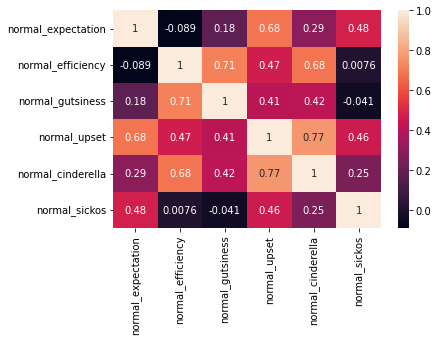

In [15]:
# correlation matrix

c_df = normal_stats_table.iloc[:, 1:]
c = c_df.columns.values
clen = len(c)

stat_corr = pd.DataFrame(np.zeros([clen, clen]), index=c, columns=c)

for i, ci in enumerate(c):
    for j, cj in enumerate(c):
        stat_corr.iloc[i, j] = c_df.iloc[:, i].corr(c_df.iloc[:, j])

display(stat_corr)

import seaborn as sns

sns.heatmap(stat_corr, annot=True)

In [16]:
# PONGKEMON !!!

sse_columns = ['HP', 'ATK','DEF','SPA','SPD','SPE']
header_stats = ['HP', 'ATK','DEF','SPA','SPD','SPE','BST']

pokemon_bst = pd.read_csv('data/pokemon_bst.csv')
pokemon_bst.columns = ['num', 'pokemon'] + header_stats + ['AVG']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pokemon_bst)

,num,pokemon,HP,ATK,DEF,SPA,SPD,SPE,BST,AVG
0,1,Bulbasaur,45,49,49,65,65,45,318,53.00
1,2,Ivysaur,60,62,63,80,80,60,405,67.50
2,3,Venusaur,80,82,83,100,100,80,525,87.50
3,3,Venusaur (Mega Venusaur),80,100,123,122,120,80,625,104.17
4,4,Charmander,39,52,43,60,50,65,309,51.50
5,5,Charmeleon,58,64,58,80,65,80,405,67.50
6,6,Charizard,78,84,78,109,85,100,534,89.00
7,6,Charizard (Mega Charizard X),78,130,111,130,85,100,634,105.67
8,6,Charizard (Mega Charizard Y),78,104,78,159,115,100,634,105.67
9,7,Squirtle,44,48,65,50,64,43,314,52.33


In [17]:
player_pokemon_dict = dict()

pongkemon_table = stats_table.copy()
pongkemon_table.columns = ['player'] + header_stats

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pongkemon_table)

# assigning sums of squared errors for every player and pokemon
for (i, row_player) in pongkemon_table.iterrows():
    
    this_player_all_poke = np.zeros(shape=(pokemon_bst.shape[0], pokemon_bst.shape[1] - 3))
    for (j, row_poke) in pokemon_bst.iterrows():

        diff = - row_player[sse_columns] + row_poke[sse_columns]
        diff['sse'] = ((diff).apply(np.square).sum())
        this_player_all_poke[j] = np.array(diff)

    pp_df = pd.DataFrame(this_player_all_poke, columns=["D_"+x for x in sse_columns] + ['SSE']).astype(int)
    pp_df['pokemon'] = pokemon_bst['pokemon']
    pp_df.index.name = f"{row_player.player} vs. Pokemon SSE"
    pp_df = pp_df.reindex(columns=['pokemon'] + ['D_'+x for x in sse_columns] + ['SSE'])
    player_pokemon_dict.update({row_player.player: pp_df})
    display(pp_df.sort_values('SSE', ascending=True))
# 

,player,HP,ATK,DEF,SPA,SPD,SPE,BST
Stats Table,,,,,,,,
0,Kristian Banlaoi,40,104,60,60,102,43,409
1,Kevin Cooper,73,107,110,71,97,50,508
2,Rohan Chowla,84,112,103,88,105,108,600
3,Rose Roché,62,93,87,60,78,60,440
4,Aaron Carter,64,95,94,69,84,50,456
5,Roman Ramirez,88,116,120,112,103,53,592
6,Coby Lovelace,86,102,85,105,109,45,532
7,Paul Bartenfeld,84,60,60,67,79,88,438
8,Jason Jackson,84,96,85,86,92,70,513


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Kristian Banlaoi vs. Pokemon SSE,,,,,,,,
430,Kecleon,20,-14,10,0,18,-3,1029
920,Komala,25,11,5,15,-7,22,1529
60,Parasect,20,-9,20,0,-22,-13,1534
113,Farfetch'd (Galarian Farfetch'd),12,-9,-5,-2,-40,12,1998
221,Ariados,30,-14,10,0,-32,-3,2229
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),10,76,-40,120,-82,107,40049
151,Chansey,210,-99,-55,-25,3,7,57609
272,Shuckle,-20,-94,170,-50,128,-38,58464


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Kevin Cooper vs. Pokemon SSE,,,,,,,,
898,Lurantis,-3,-2,-20,9,-7,-5,568
480,Torterra,22,2,-5,4,-12,6,709
426,Armaldo,2,18,-10,-1,-17,-5,743
739,Druddigon,4,13,-20,-11,-7,-2,759
816,Barbaracle,-1,-2,5,-17,-11,18,764
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-23,73,-90,109,-77,100,41768
272,Shuckle,-53,-97,120,-61,133,-45,50053
305,Blissey,182,-97,-100,4,38,5,54018


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Rohan Chowla vs. Pokemon SSE,,,,,,,,
203,Mew,16,-12,-3,12,-5,-8,642
601,Victini,16,-12,-3,12,-5,-8,642
598,Shaymin (Land Forme),16,-12,-3,12,-5,-8,642
596,Manaphy,16,-12,-3,12,-5,-8,642
315,Celebi,16,-12,-3,12,-5,-8,642
...,...,...,...,...,...,...,...,...
534,Happiny,16,-107,-98,-73,-40,-78,34322
305,Blissey,171,-102,-93,-13,30,-53,52172
151,Chansey,166,-107,-98,-53,0,-58,54782


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Rose Roché vs. Pokemon SSE,,,,,,,,
212,Croconaw,3,-13,-7,-1,-15,-2,457
717,Klang,-2,-13,8,10,7,-10,486
928,Hakamo-o,-7,-18,3,5,-8,5,496
753,Zweilous,10,-8,-17,5,-8,-2,546
325,Marshtomp,8,-8,-17,0,-8,-10,581
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-12,87,-67,120,-58,90,38066
151,Chansey,188,-88,-82,-25,27,-10,51266
305,Blissey,193,-83,-77,15,57,-5,53566


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Aaron Carter vs. Pokemon SSE,,,,,,,,
717,Klang,-4,-15,1,1,1,0,244
898,Lurantis,6,10,-4,11,6,-5,334
1023,Eiscue (Ice Face),11,-15,16,-4,6,0,654
457,Metang,-4,-20,6,-14,-4,0,664
505,Wormadam (Sandy Cloak),-4,-16,11,-10,1,-14,690
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-14,85,-74,111,-64,100,39314
151,Chansey,186,-90,-89,-34,21,0,52214
305,Blissey,191,-85,-84,6,51,5,53424


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Roman Ramirez vs. Pokemon SSE,,,,,,,,
942,Celesteela,9,-15,-17,-5,-2,8,688
861,Volcanion,-8,-6,0,18,-13,17,882
1062,Enamorus (Therian Forme),-14,-1,-10,23,-3,-7,884
311,Tyranitar,12,18,-10,-17,-3,8,930
412,Altaria (Mega Altaria),-13,-6,-10,-2,2,27,1042
...,...,...,...,...,...,...,...,...
427,Feebas,-68,-101,-100,-102,-48,27,38262
305,Blissey,167,-106,-110,-37,32,2,53622
272,Shuckle,-68,-106,110,-102,127,-48,56797


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Coby Lovelace vs. Pokemon SSE,,,,,,,,
486,Empoleon,-2,-16,3,6,-8,15,594
865,Decidueye (Hisuian Decidueye),2,10,-5,-10,-14,15,650
916,Type: Null,9,-7,10,-10,-14,14,722
942,Celesteela,11,-1,18,2,-8,16,770
864,Decidueye,-8,5,-10,-5,-9,25,920
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-36,78,-65,75,-89,105,36176
305,Blissey,169,-92,-75,-30,26,10,44326
151,Chansey,164,-97,-80,-70,-4,5,47646


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Paul Bartenfeld vs. Pokemon SSE,,,,,,,,
55,Golbat,-9,20,10,-2,-4,2,605
553,Lumineon,-15,9,16,2,7,3,624
786,Diggersby,1,-4,17,-17,-2,-10,699
514,Cherrim,-14,0,10,20,-1,-3,706
62,Venomoth,-14,5,0,23,-4,2,770
...,...,...,...,...,...,...,...,...
379,Aggron (Mega Aggron),-14,80,170,-7,1,-38,36990
475,Deoxys (Attack Forme),-34,120,-40,113,-59,62,37250
305,Blissey,171,-50,-50,8,56,-33,38530


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Jason Jackson vs. Pokemon SSE,,,,,,,,
42,Nidoqueen,6,-4,2,-11,-7,6,262
556,Abomasnow,6,-4,-10,6,-7,-10,337
82,Poliwrath,6,-1,10,-16,-2,0,397
916,Type: Null,11,-1,10,9,3,-11,433
1031,Arctozolt,6,4,5,4,-12,-15,462
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-34,84,-65,94,-72,80,32857
305,Blissey,171,-86,-75,-11,43,-15,44457
151,Chansey,166,-91,-80,-51,13,-20,45407


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Jack Massingill vs. Pokemon SSE,,,,,,,,
590,Heatran,3,-12,4,10,4,-6,321
584,Mesprit,-8,3,3,-15,3,-3,325
945,Necrozma,9,5,-1,7,-13,-4,341
412,Altaria (Mega Altaria),-13,8,8,-10,3,-3,415
195,Moltres,2,-2,-12,5,-17,7,515
...,...,...,...,...,...,...,...,...
534,Happiny,12,-97,-97,-105,-37,-53,34165
305,Blissey,167,-92,-92,-45,33,-28,48715
151,Chansey,162,-97,-97,-85,3,-33,53385


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Evan Sooklal vs. Pokemon SSE,,,,,,,,
445,Sealeo,5,-10,10,5,-11,2,375
863,Dartrix,-7,5,15,0,-11,9,501
262,Dunsparce,15,0,10,-5,-16,2,610
825,Amaura,-8,-11,-10,-3,-18,3,627
485,Prinplup,-21,-4,8,11,-5,7,716
...,...,...,...,...,...,...,...,...
151,Chansey,165,-65,-55,-35,24,7,36325
305,Blissey,170,-60,-50,5,54,12,38085
475,Deoxys (Attack Forme),-35,110,-40,110,-61,107,42195


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Leah Baetcke vs. Pokemon SSE,,,,,,,,
306,Raikou,-5,-2,3,-1,-5,-5,89
465,Latios,-15,3,8,14,5,-10,619
761,Tornadus (Therian Forme),-16,13,8,-6,-15,1,751
193,Zapdos,-5,3,13,9,-15,-20,909
192,Articuno (Galarian Articuno),-5,-2,13,9,-5,-25,929
...,...,...,...,...,...,...,...,...
265,Steelix (Mega Steelix),-20,38,158,-61,-10,-90,38729
305,Blissey,160,-77,-62,-41,30,-65,42179
151,Chansey,155,-82,-67,-81,0,-70,46699


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Gabe Silverstein vs. Pokemon SSE,,,,,,,,
942,Celesteela,8,0,9,2,-4,3,174
916,Type: Null,6,-6,1,-10,-10,1,274
486,Empoleon,-5,-15,-6,6,-4,2,342
865,Decidueye (Hisuian Decidueye),-1,11,-14,-10,-10,2,522
296,Porygon2,-4,-21,-4,0,-10,2,577
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-39,79,-74,75,-85,92,34552
305,Blissey,166,-91,-84,-30,30,-3,44702
151,Chansey,161,-96,-89,-70,0,-8,48022


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Reagan Fryatt vs. Pokemon SSE,,,,,,,,
424,Cradily,1,-11,-8,-8,9,0,331
1033,Arctovish,5,-2,-5,-9,-8,12,343
236,Bellossom,-10,-12,-10,1,2,7,398
509,Vespiquen,-15,-12,-3,-9,4,-3,484
916,Type: Null,10,3,-10,6,-3,16,510
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-35,88,-85,91,-78,107,42008
305,Blissey,170,-82,-95,-14,37,12,46358
151,Chansey,165,-87,-100,-54,7,7,47808


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Carla Betancourt vs. Pokemon SSE,,,,,,,,
196,Moltres (Galarian Moltres),-10,-8,-4,-12,5,-5,374
191,Articuno,-10,-8,6,-17,5,-10,614
203,Mew,0,7,6,-12,-20,5,654
315,Celebi,0,7,6,-12,-20,5,654
473,Jirachi,0,7,6,-12,-20,5,654
...,...,...,...,...,...,...,...,...
173,Magikarp,-80,-83,-39,-97,-100,-15,34444
305,Blissey,155,-83,-84,-37,15,-40,41164
151,Chansey,150,-88,-89,-77,-15,-45,46344


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Levin Lee vs. Pokemon SSE,,,,,,,,
926,Dhelmise,-6,11,-14,-2,-18,0,681
531,Bronzong,-9,-31,2,-9,8,-7,1240
898,Lurantis,-6,-15,-24,-8,-18,5,1250
311,Tyranitar,24,14,-4,7,-8,21,1342
426,Armaldo,-1,5,-14,-18,-28,5,1355
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-26,60,-94,92,-88,110,41420
272,Shuckle,-56,-110,116,-78,122,-35,50885
305,Blissey,179,-110,-104,-13,27,15,56080


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Cason Duszak vs. Pokemon SSE,,,,,,,,
717,Klang,5,-2,1,10,-1,5,156
457,Metang,5,-7,6,-5,-6,5,196
1076,Spidops,5,-3,-2,-8,0,-10,202
878,Charjabug,2,0,1,-5,-11,-9,232
505,Wormadam (Sandy Cloak),5,-3,11,-1,-1,-9,238
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-5,98,-74,120,-66,105,44886
272,Shuckle,-35,-72,136,-50,144,-40,49741
151,Chansey,195,-77,-89,-25,19,5,52886


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Will Simpson vs. Pokemon SSE,,,,,,,,
293,Kingdra,-8,-2,-5,-3,-3,10,211
584,Mesprit,-3,8,5,7,7,5,221
11,Blastoise,-4,-14,0,-13,7,3,439
916,Type: Null,12,-2,-5,-3,-3,-16,447
206,Meganium,-3,-15,0,-15,2,5,488
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-33,83,-80,82,-78,75,32811
305,Blissey,172,-87,-90,-23,37,-20,47551
151,Chansey,167,-92,-95,-63,7,-25,50021


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Ann Hall vs. Pokemon SSE,,,,,,,,
1033,Arctovish,4,4,6,-9,-6,-3,194
916,Type: Null,9,9,1,6,-1,1,201
236,Bellossom,-11,-6,1,1,4,-8,239
296,Porygon2,-1,-6,-4,16,-1,2,314
424,Cradily,0,-5,3,-8,11,-15,444
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-36,94,-74,91,-76,92,38129
305,Blissey,169,-76,-84,-14,39,-3,43119
151,Chansey,164,-81,-89,-54,9,-8,44439


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Helen Dunn vs. Pokemon SSE,,,,,,,,
1032,Dracovish,4,12,6,1,1,2,202
814,Malamar,0,14,-6,-1,-4,0,249
42,Nidoqueen,4,14,-7,6,6,3,342
812,Slurpuff,-4,2,-8,16,-4,-1,357
595,Phione,-6,2,-14,11,1,7,407
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-36,102,-74,111,-59,77,38907
151,Chansey,164,-73,-89,-34,26,-23,42507
305,Blissey,169,-68,-84,6,56,-18,43737


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Noah Dale vs. Pokemon SSE,,,,,,,,
392,Swalot,14,-5,-11,4,4,5,399
1033,Arctovish,4,12,6,11,11,5,463
436,Tropius,13,-10,-11,3,8,1,464
1023,Eiscue (Ice Face),-11,2,16,-4,11,0,518
863,Dartrix,-8,-3,-19,1,-9,2,520
...,...,...,...,...,...,...,...,...
151,Chansey,164,-73,-89,-34,26,0,41978
475,Deoxys (Attack Forme),-36,102,-74,111,-59,100,42978
305,Blissey,169,-68,-84,6,56,5,43438


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Yvonne Nguyen vs. Pokemon SSE,,,,,,,,
753,Zweilous,-8,8,10,-2,-4,-2,252
863,Dartrix,-2,-2,15,3,-4,-8,322
310,Pupitar,-10,7,10,-2,-4,-9,350
158,Seaking,0,15,5,-2,6,8,354
429,Castform,-10,-7,10,3,-4,10,374
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-30,103,-40,113,-54,90,36894
151,Chansey,170,-72,-55,-32,31,-10,39194
305,Blissey,175,-67,-50,8,61,-5,41424


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Anna Brown vs. Pokemon SSE,,,,,,,,
509,Vespiquen,-7,-9,8,2,8,0,262
424,Cradily,9,-8,3,3,13,3,341
898,Lurantis,-7,16,-4,2,-4,5,366
236,Bellossom,-2,-9,1,12,6,10,366
1033,Arctovish,13,1,6,2,-4,15,451
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-27,91,-74,102,-74,110,42466
305,Blissey,178,-79,-84,-3,41,15,46896
151,Chansey,173,-84,-89,-43,11,10,46976


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Brian Tafazoli vs. Pokemon SSE,,,,,,,,
445,Sealeo,11,-3,10,6,-18,5,615
485,Prinplup,-15,3,8,12,-12,10,686
183,Porygon,-14,-3,10,16,-13,0,730
145,Lickitung,11,-8,15,-9,-13,-10,760
825,Amaura,-2,-4,-10,-2,-25,6,785
...,...,...,...,...,...,...,...,...
151,Chansey,171,-58,-55,-34,17,10,37175
305,Blissey,176,-53,-50,6,47,15,38755
475,Deoxys (Attack Forme),-29,117,-40,111,-68,110,45175


In [18]:
best_pokemon_table = pd.DataFrame(columns=player_pokemon_dict['Roman Ramirez'].columns)
best_pokemon_table.index.name = "Best Pokemon Match"

for (i, row) in pongkemon_table.iterrows(): 
    best_pokemon_table.loc[i] = player_pokemon_dict[row.player].sort_values('SSE', ascending=True).reset_index(drop=True).iloc[0]
# display(pongkemon_table)
# display(best_pokemon_table)

total_pokemon_table = pd.concat([pongkemon_table, best_pokemon_table], axis=1).reset_index(drop=True)
sum_sse = total_pokemon_table.SSE.sum()
display(total_pokemon_table.sort_values('SSE', ascending=True))
display(sum_sse)

# 40-120's SSE: 17238
# 60-120's SSE: 15360

,player,HP,ATK,DEF,SPA,SPD,SPE,BST,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
11,Leah Baetcke,95,87,72,116,105,120,595,Raikou,-5,-2,3,-1,-5,-5,89
16,Cason Duszak,55,82,94,60,86,45,422,Klang,5,-2,1,10,-1,5,156
12,Gabe Silverstein,89,101,94,105,105,58,552,Celesteela,8,0,9,2,-4,3,174
18,Ann Hall,86,86,94,89,96,58,509,Arctovish,4,4,6,-9,-6,-3,194
19,Helen Dunn,86,78,94,69,79,73,479,Dracovish,4,12,6,1,1,2,202
17,Will Simpson,83,97,100,98,98,75,551,Kingdra,-8,-2,-5,-3,-3,10,211
4,Aaron Carter,64,95,94,69,84,50,456,Klang,-4,-15,1,1,1,0,244
21,Yvonne Nguyen,80,77,60,67,74,60,418,Zweilous,-8,8,10,-2,-4,-2,252
8,Jason Jackson,84,96,85,86,92,70,513,Nidoqueen,6,-4,2,-11,-7,6,262
22,Anna Brown,77,89,94,78,94,40,472,Vespiquen,-7,-9,8,2,8,0,262


9725

In [19]:
best_pokemon_table['D_HP'].mean()

best_pokemon_table.iloc[:,1:].mean()

D_HP       1.958333
D_ATK     -4.166667
D_DEF      0.166667
D_SPA      0.500000
D_SPD     -2.833333
D_SPE      1.000000
SSE      405.208333
dtype: float64

In [20]:
### matches tables
# matches_1s
# matches_2s
# matches_table

### players tables
# players
# cups_table
# wl_table
# fa_table, remove: GP
# hcs_table
# str_table, remove: PTS, expectation, cinderella
# sickos_table, remove: +/-, W_PCT, sickos, guisiness
# upset_table, remove: total_upset
# raw_stats_table
# stats_table
# best_pokemon_table: remove: HP, ATK, DEF, SPA, SPD, SPE, BST

In [21]:
# export matches table
export(matches_table, 'matches_table')

In [22]:
# player pokemon table matches
# export whole dictionary
for (key, value) in player_pokemon_dict.items():
    export(value, f"player_pokemon_sse/pkmn_sse_{key.replace(' ', '_')}")

In [23]:
# merge
list_players_tables = list()
list_players_tables.append(players.iloc[:,[x not in [''] for x in players.columns]])
# list_players_tables.append(cups_table.iloc[:,[x not in ['player'] for x in cups_table.columns]])
list_players_tables.append(wl_table.iloc[:,[x not in ['player'] for x in wl_table.columns]])
list_players_tables.append(fa_table.iloc[:,[x not in ['player', 'GP'] for x in fa_table.columns]])
list_players_tables.append(hcs_table.iloc[:,[x not in ['player'] for x in hcs_table.columns]])
list_players_tables.append(str_table.iloc[:,[x not in ['player', 'PTS', 'expectation', 'cinderella'] for x in str_table.columns]])
list_players_tables.append(sickos_table.iloc[:,[x not in ['player', '+/-', 'W_PCT', 'sickos', 'gutsiness'] for x in sickos_table.columns]])
list_players_tables.append(upset_table.iloc[:,[x not in ['player'] for x in upset_table.columns]])
list_players_tables.append(raw_stats_table.iloc[:,[x not in ['player'] for x in raw_stats_table.columns]])
list_players_tables.append(normal_stats_table.iloc[:,[x not in ['player'] for x in normal_stats_table.columns]])
list_players_tables.append(stats_table.iloc[:,[x not in ['player'] for x in stats_table.columns]])
list_players_tables.append(best_pokemon_table.iloc[:,[x not in ['player', 'HP', 'ATK', 'DEF', 'SPA', 'SPD', 'SPE', 'BST'] for x in best_pokemon_table.columns]])

players_table =  pd.concat(list_players_tables, join='outer', axis=1).fillna(np.NaN)
players_table = players_table.sort_values('player', ascending=True).reset_index(drop=True)

# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'], how='outer'), data_frames)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(players_table)

# export players table
export(players_table, 'players_table', index=False)

,player,year_2023,seed_2021_2s,seed_2022_1s,seed_2022_2s,num_events,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,avg_norm_seed,year_2023,W_1s,UW_1s,EW_1s,L_1s,UL_1s,EL_1s,RL_1s,URL_1s,ERL_1s,W_2s,UW_2s,EW_2s,L_2s,UL_2s,EL_2s,RL_2s,URL_2s,ERL_2s,UW,EW,UL,EL,URL,ERL,GP,UGP,EGP,ODW,ODL,ODRL,UDW,UDL,UDRL,W,L,RL,PTS,PTS/EV,W_PCT,UW_PCT,EW_PCT,GP_1s,PF_1s,PA_1s,CA_1s,+/-_1s,GP_2s,PF_2s,PA_2s,CA_2s,+/-_2s,PF,PA,CA,+/-,PF/G,PA/G,CA/G,+/-/G,PF/PA,PF/CA,(+/-)/CA,hcs_1s,hcs_2s,hcs,hcs/event,total_seeds_1s,total_seeds_2s,total_seeds,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,z_SOS,z_SOV,z_PTS,z_PTS/EV,avg_norm_seed,PTS/EV,n_avg_norm_seed,n_PTS/EV,z_+/-,z_W_PCT,sickos_resids,EW,EL,EGP,raw_poll_scores,GP,W,total_upset,avg_upset,total_upset/GP,total_upset/W,raw_expectation,raw_efficiency,raw_gutsiness,raw_upset,raw_cinderella,raw_sickos,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos,expectation,efficiency,gutsiness,upset,cinderella,sickos,BST,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
0,Aaron Carter,4.0,1.0,5.0,3.0,3,-1.479020,-0.670820,-0.752773,-0.967538,4.0,1,0,1,2,1,1,0,0,0,3,1,2,4,2,2,0,0,0,1,3,3,3,0,0,10,4,6,3,6,0,1,0,0,4,6,0,5,1.666667,40.000000,25.000000,50.000000,3,12,15,18,-3,7,38,38,45,0,50,53,63,-3,5.000000,5.300000,6.300000,-0.300000,94.339623,79.365079,-0.047619,3,8,11,3.666667,26,44,70,0.577778,0.785714,33.333333,8.888889,0.318254,0.211111,-1.303611,-0.298443,-0.170773,-0.056924,-0.967538,1.666667,-0.618137,0.227273,-0.341328,-0.200000,0.586460,3,3,6,4,10,4,0.576190,0.288095,0.057619,0.144048,-0.675608,-0.047619,0.000000,0.576190,0.797376,4,0.397892,0.571429,0.555556,0.136775,0.398688,0.12500,64,95,94,69,84,50,456,Klang,-4,-15,1,1,1,0,244
1,Ann Hall,4.0,7.0,NaN,7.0,2,1.056443,NaN,0.752773,0.904608,4.0,0,0,0,0,0,0,0,0,0,1,0,1,3,2,1,1,0,1,0,1,2,1,0,1,5,2,3,0,0,0,1,3,1,1,3,1,2,1.000000,20.000000,0.000000,33.333333,0,0,0,0,0,5,26,31,33,-5,26,31,33,-5,5.200000,6.200000,6.600000,-1.000000,83.870968,78.787879,-0.151515,0,6,6,3.000000,0,15,15,NaN,0.375000,NaN,16.666667,0.625000,0.166667,1.192539,-0.518364,-0.662599,-0.331299,0.904608,1.000000,0.577933,0.136364,-0.568880,-0.600000,-0.184377,1,1,3,7,5,1,1.968254,0.328042,0.393651,1.968254,0.243450,-0.151515,0.000000,1.968254,1.168566,7,0.766023,0.421818,0.555556,0.467219,0.584283,0.21875,86,86,94,89,96,58,509,Arctovish,4,4,6,-9,-6,-3,194
2,Anna Brown,NaN,7.0,NaN,NaN,1,1.056443,NaN,NaN,1.056443,NaN,0,0,0,0,0,0,0,0,0,1,0,1,2,1,1,0,0,0,0,1,1,1,0,0,3,1,2,0,0,0,1,2,0,1,2,0,1,1.000000,33.333333,0.000000,50.000000,0,0,0,0,0,3,14,16,18,-2,14,16,18,-2,4.666667,5.333333,6.000000,-0.666667,87.500000,77.777778,-0.111111,0,3,3,3.000000,0,10,10,NaN,0.416667,NaN,16.666667,0.583333,0.166667,0.853476,-0.518364,-0.826541,-0.826541,1.056443,1.000000,0.674937,0.136364,-0.227552,-0.333333,0.022998,1,1,2,0,3,1,1.238095,0.309524,0.412698,1.238095,-0.159546,-0.111111,0.000000,1.238095,1.108469,0,0.604602,0.480000,0.555556,0.293896,0.554235,0.00000,77,89,94,78,94,40,472,Vespiquen,-7,-9,8,2,8,0,262
3,Brian Tafazoli,2.0,8.0,NaN,NaN,1,1.479020,NaN,NaN,1.479020,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,1,1,0,0,2,1,1,0,0,0,0,2,0,0,2,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,2,7,12,12,-5,7,12,12,-5,3.500000,6.000000,6.000000,-2.500000,58.333333,58.333333,-0.416667,0,2,2,2.000000,0,6,6,NaN,0.375000,NaN,NaN,0.625000,0.000000,1.192539,-1.343066,-0.990482,-0.990482,1.479020,0.000000,0.944911,0.000000,-0.568880,-1.000000,-1.413800,0,1,1,0,2,0,0.595238,0.198413,0.297619,inf,-0.055089,-0.416667,-1.000000,0.595238,0.901442,0,0.646442,0.040000,0.000000,0.141296,0.450721,0.00000,79,63,60,69,88,40,399,Sealeo,11,-3,10,6,-18,5,615
4,Carla Betancourt,4.0,NaN,15.0,NaN,1,NaN,1.565248,NaN,1.565248,4.0,3,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,5,3,2,0,0,0,3,2,0,3,2,0,5,5.000000,60.000000,66.666667,50.000000,5,23,25,30,-2,0,0,0,0,0,23,25,30,-2,4.600000,5.000000,6.000000,-0.400000,92.000000,76.666667,-0.066667,5,0,5,5.000000,23,0,23,0.306667,